In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [118]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Exploratory Data Analysis

In [119]:
df.shape

(36275, 19)

In [120]:
df.isnull().sum() # or: data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [121]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [122]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


So far,
1. There is no missing/duplicate values in this dataset (36275 rows and 19 columns) to be dealt with.
2. Can't tell if any columns are statistically correlated at a glance. We have to dig into it by using data visulization.

In [123]:
# change the 'market_segment_type' to integer
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [124]:
segment = {'Offline':1, 'Online':2, 'Corporate':3, 'Aviation':4, 'Complementary':5}
df['market_segment_type'] = df['market_segment_type'].apply(lambda x: segment[x])
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,1,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,2,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,2,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,2,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,2,0,0,0,94.50,0,Canceled


In [131]:
# change the 'booking_status' from string type to integer type (binary value)
df['booking_status'] = df['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,1,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,2,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,2,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,2,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,2,0,0,0,94.50,0,1


<AxesSubplot:>

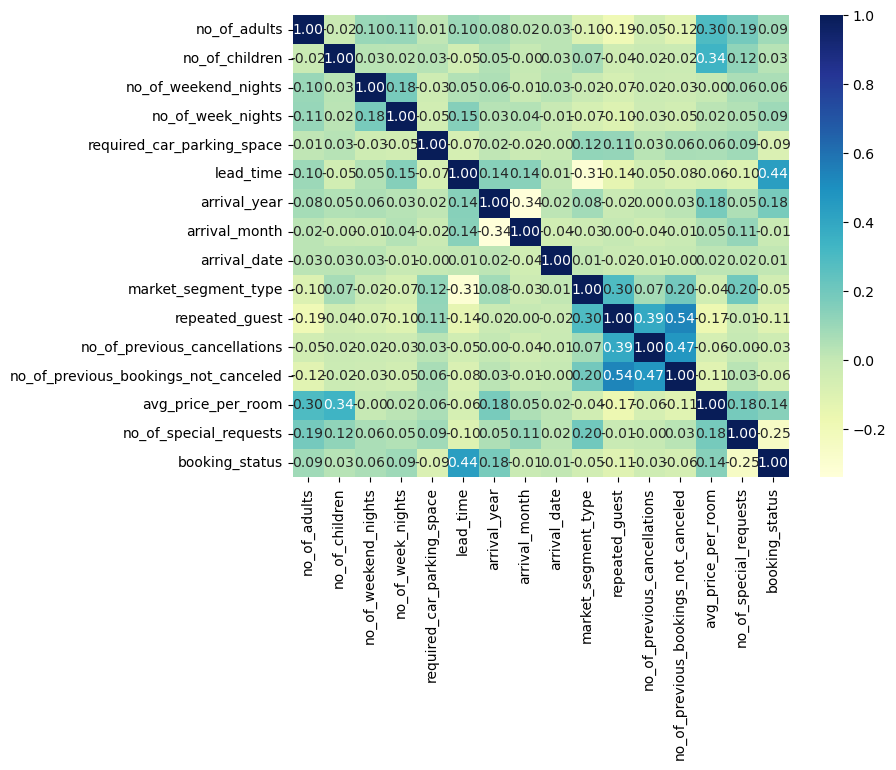

In [132]:
# Correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

We can see that 'lead_time'plays an important role in the cancellation.

<Figure size 1200x1100 with 0 Axes>

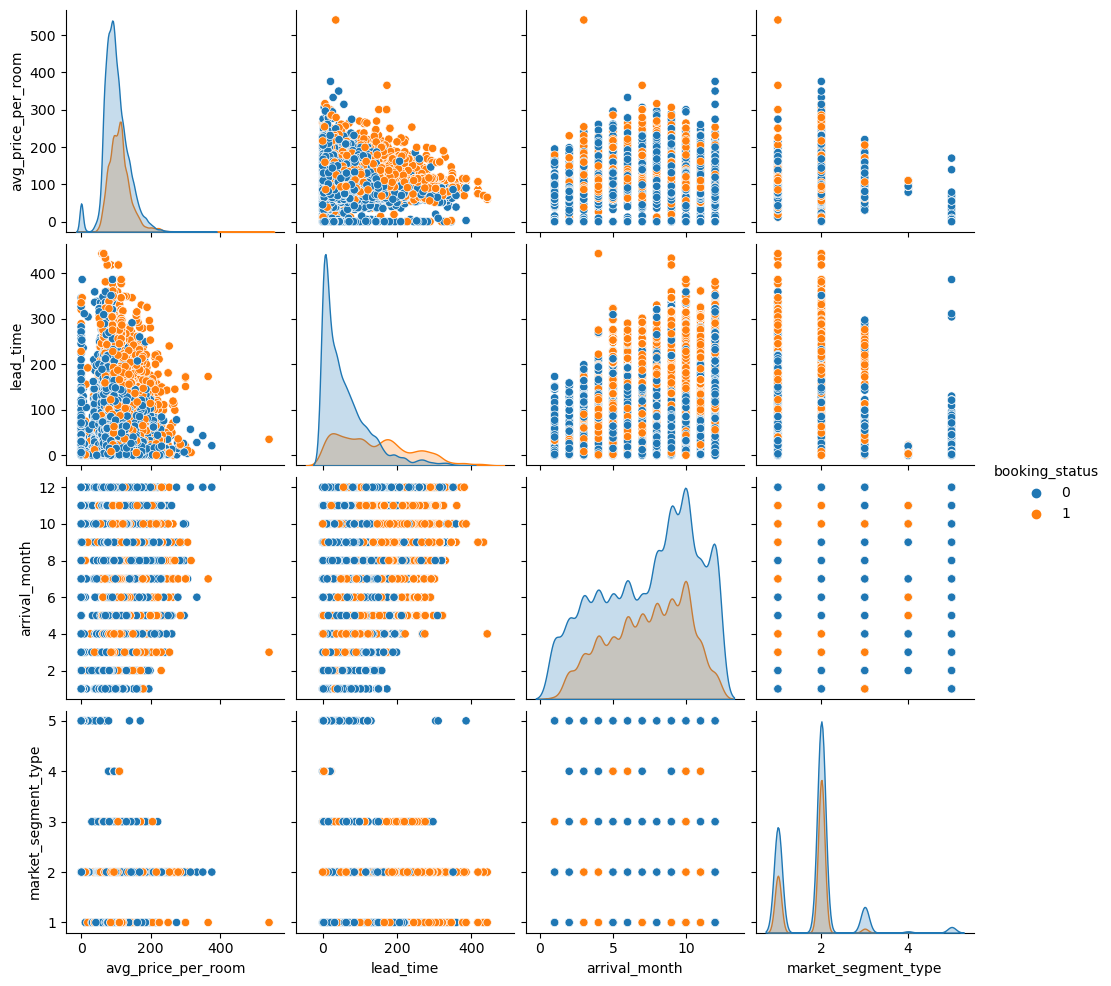

In [133]:
plt.figure(figsize=(12,11))
sns.pairplot(df[['avg_price_per_room', 'lead_time', 'arrival_month', 'market_segment_type', 'booking_status']], hue='booking_status')
# The diagonal line shows the distribution of values in that variable using a histogram. 
# Each other cell shows the relationship as a scatterplot between the two variables at their intersection.

market_segment_type = {'Offline':1, 'Online':2, 'Corporate':3, 'Aviation':4, 'Complementary':5}
1. Online booking tends to be cancelled more often than other segments.
2. Online booking over $300 per room has smaller chance to cancel.

<AxesSubplot:xlabel='booking_status', ylabel='count'>

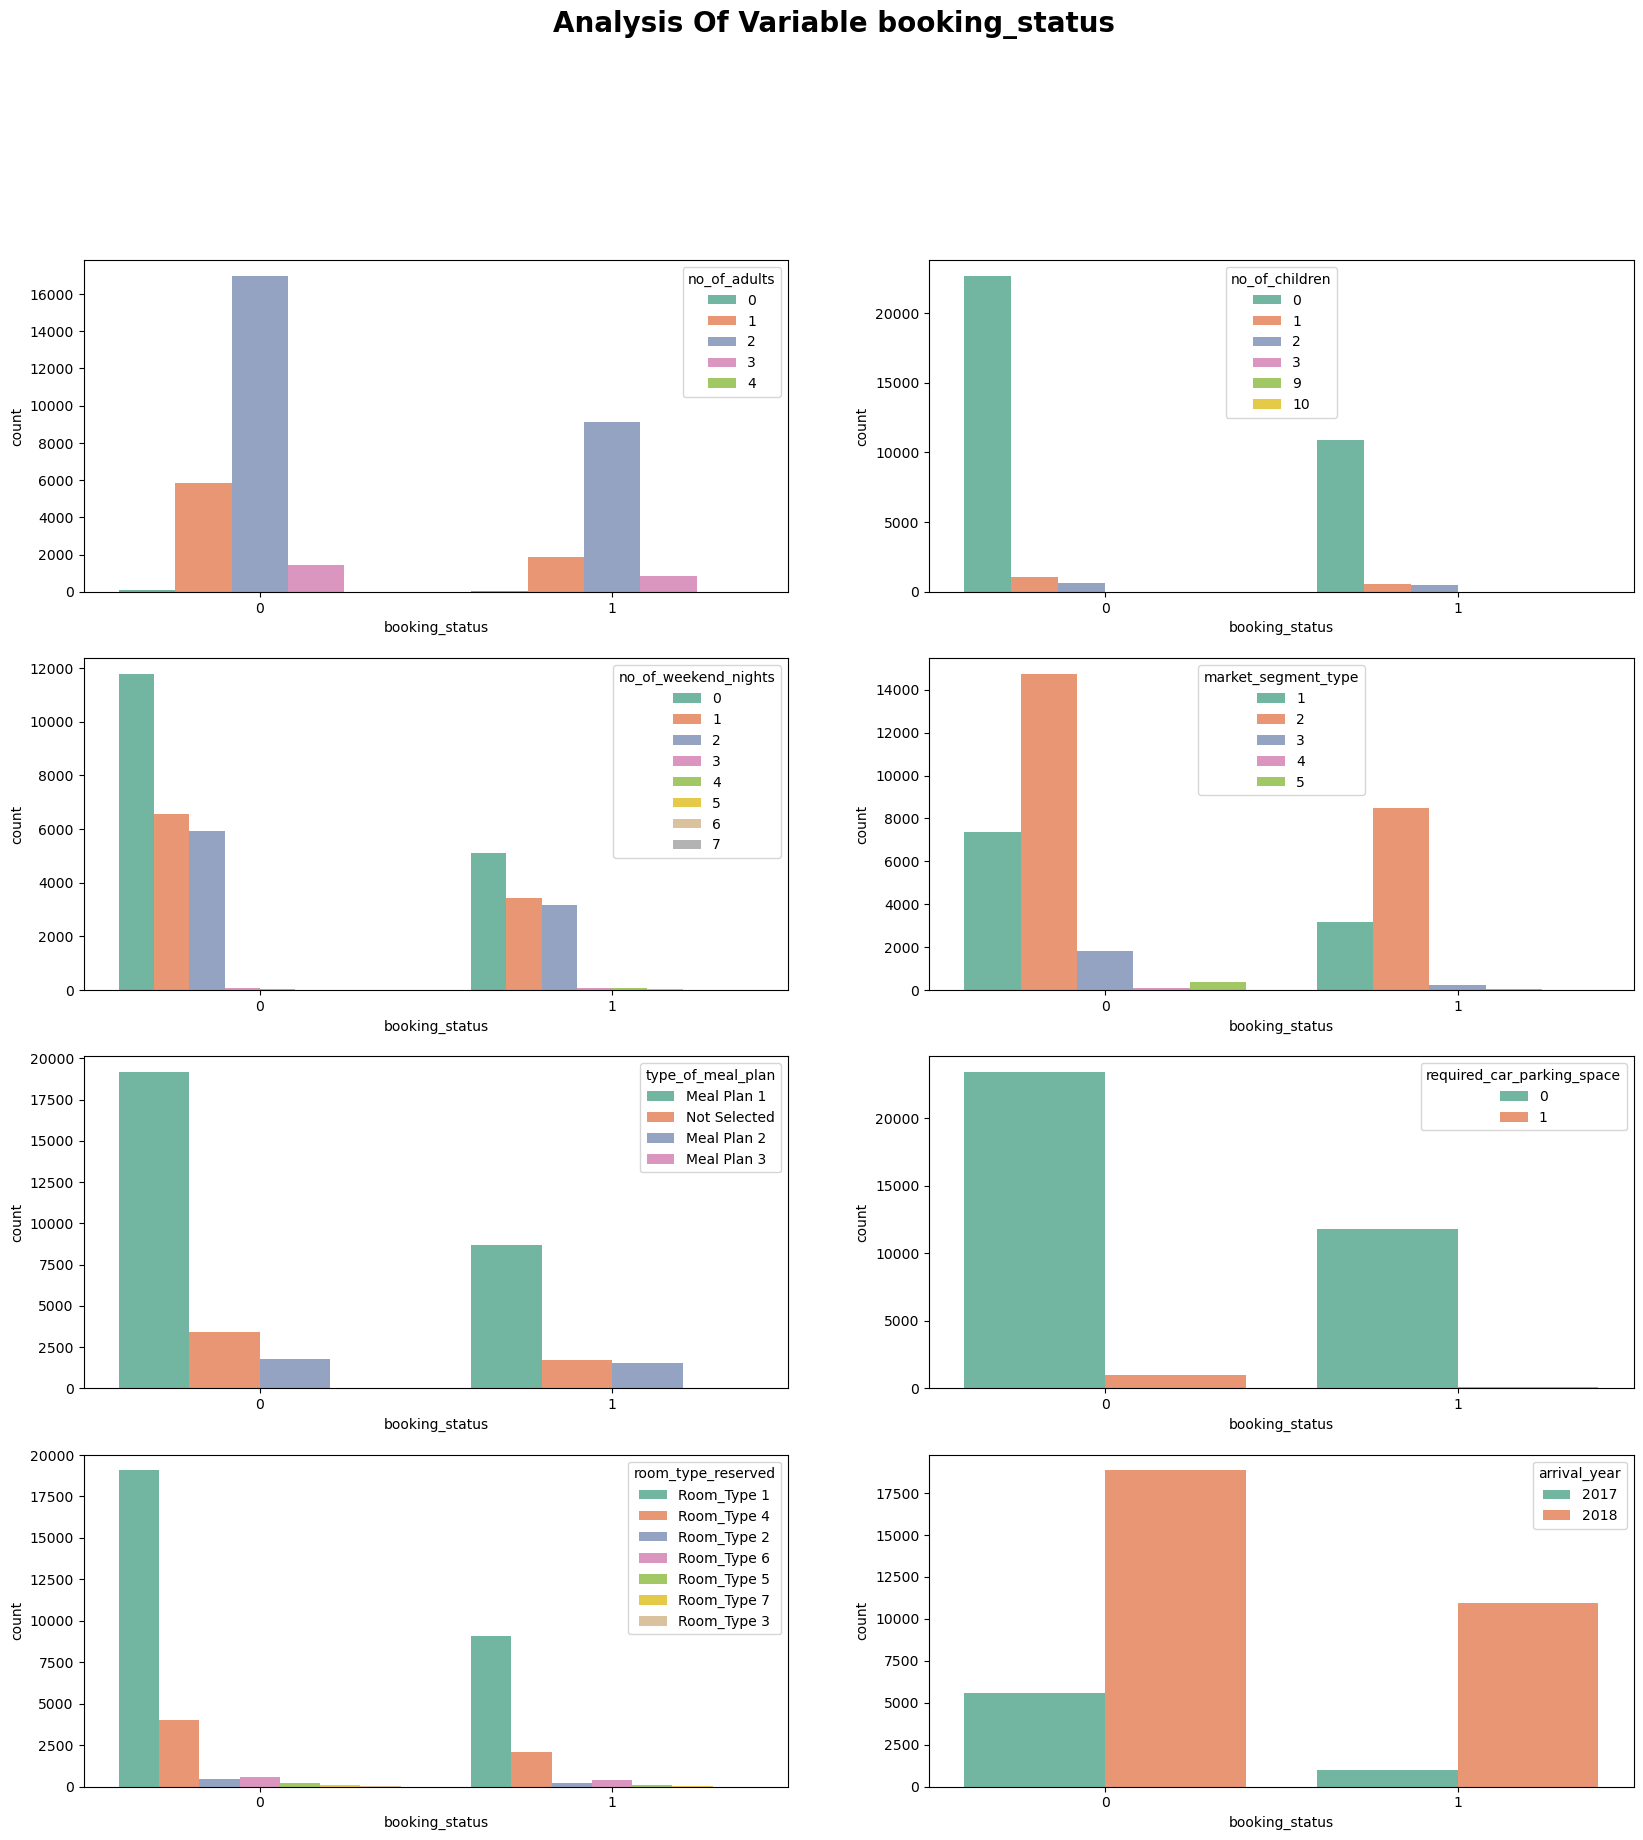

In [141]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

In [75]:
# room_type
P = df.groupby('room_type_reserved')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).reset_index()
P['Percentage'] = 100 * P['count']  / P['count'].sum()
P.round(1).astype(str)+"%"


,room_type_reserved,count,Percentage
0,Room_Type 1%,28130%,77.5%
1,Room_Type 4%,6057%,16.7%
2,Room_Type 6%,966%,2.7%
3,Room_Type 2%,692%,1.9%
4,Room_Type 5%,265%,0.7%
5,Room_Type 7%,158%,0.4%
6,Room_Type 3%,7%,0.0%


<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

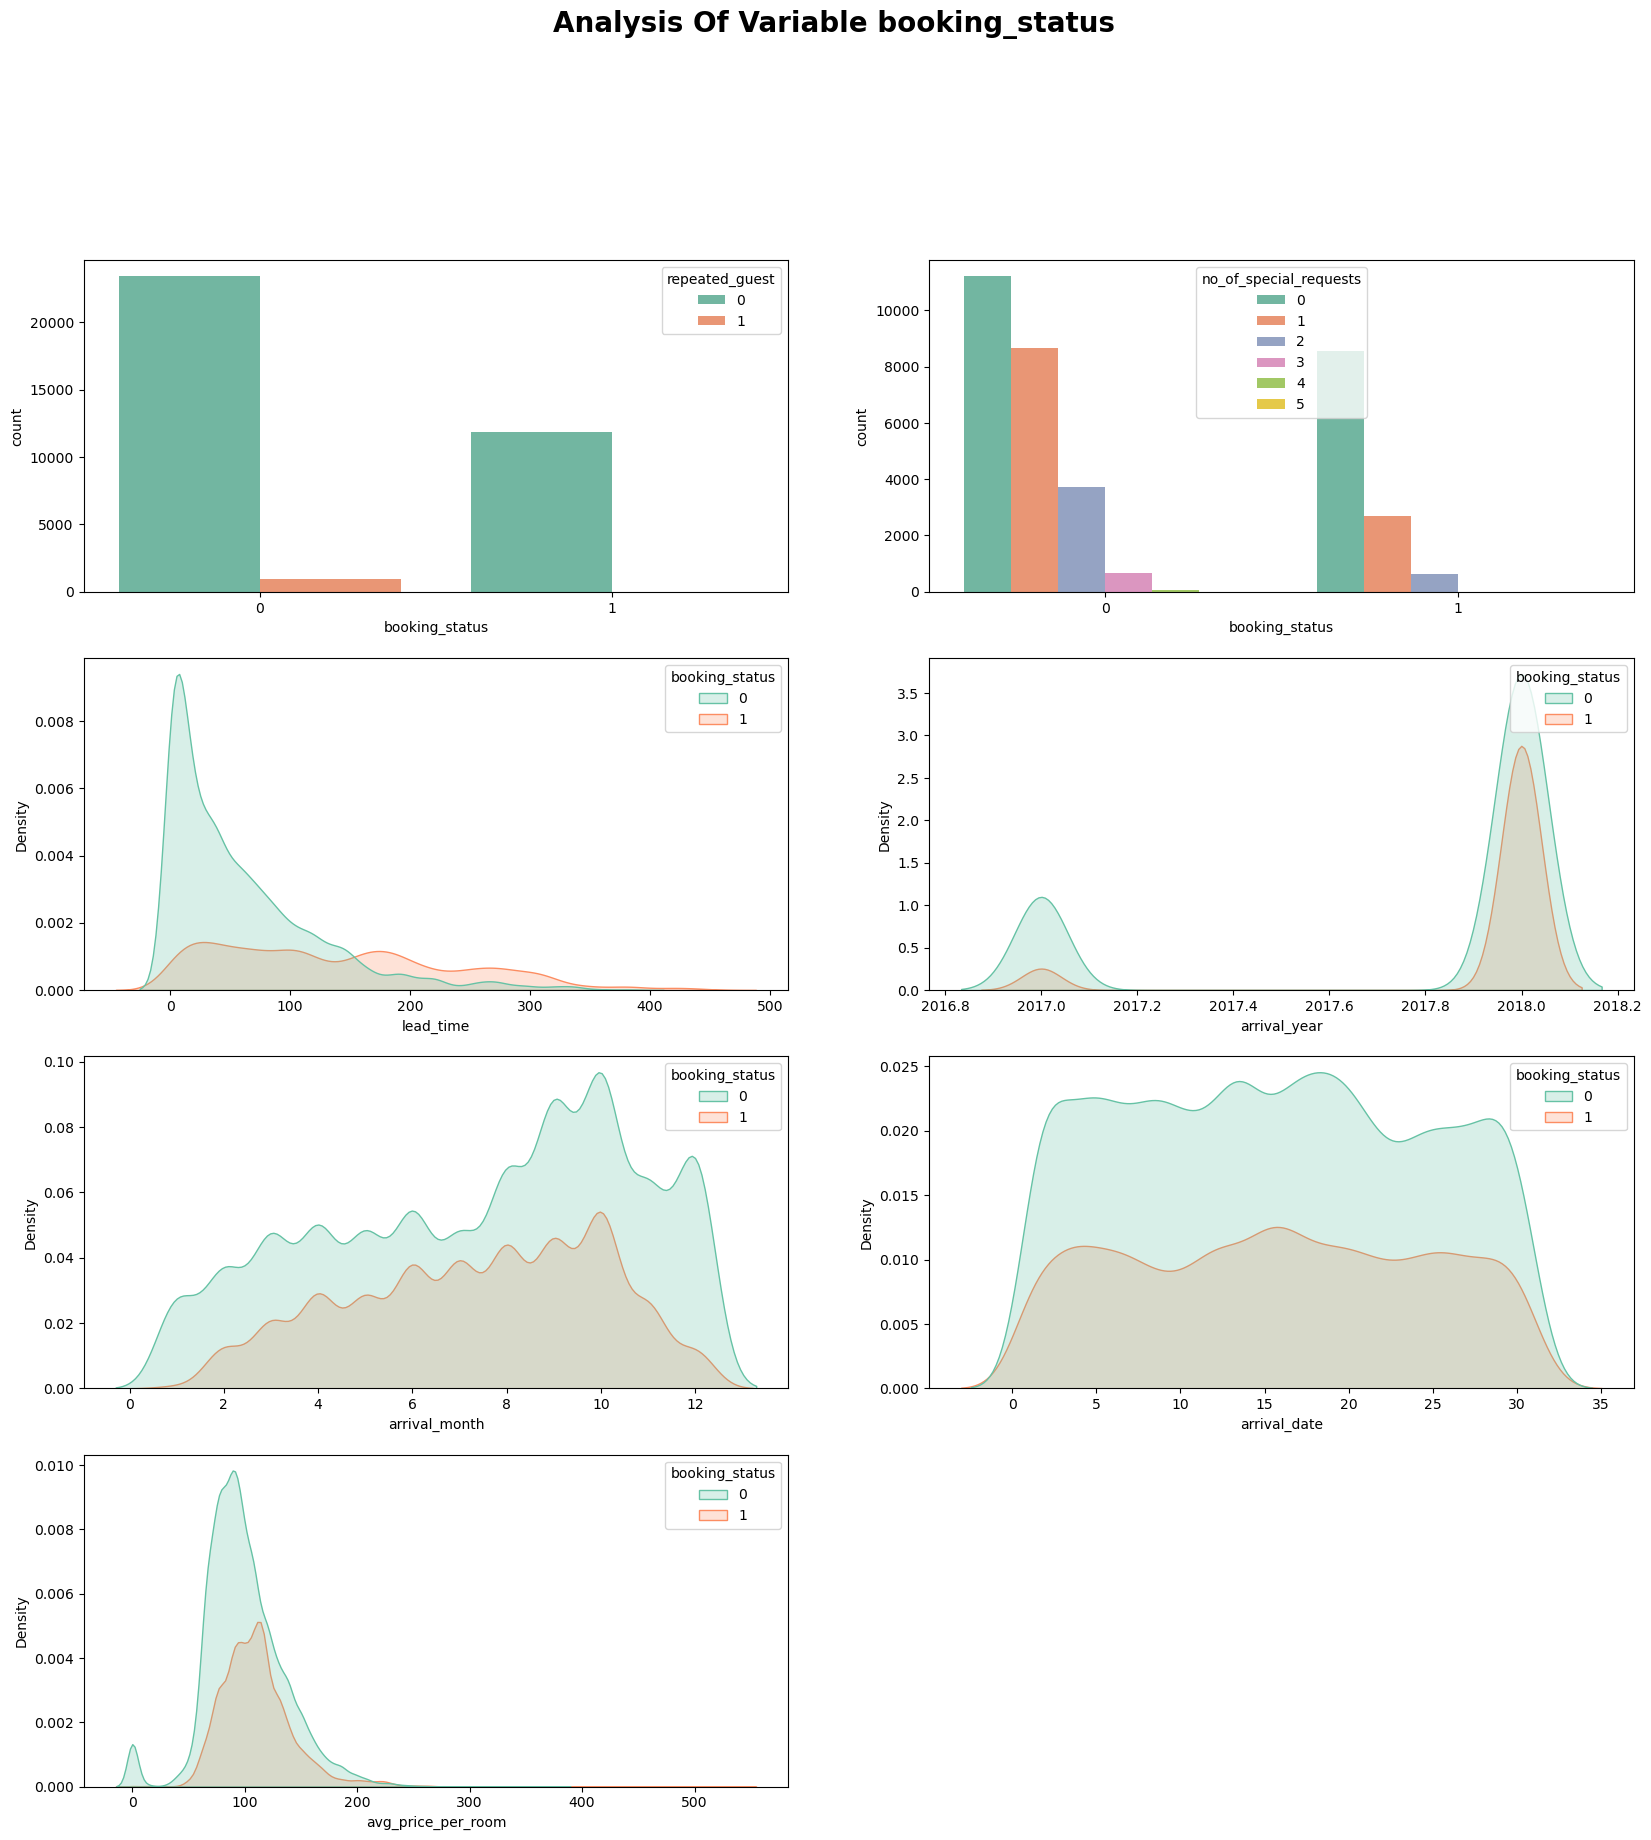

In [139]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)

## lead_time

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

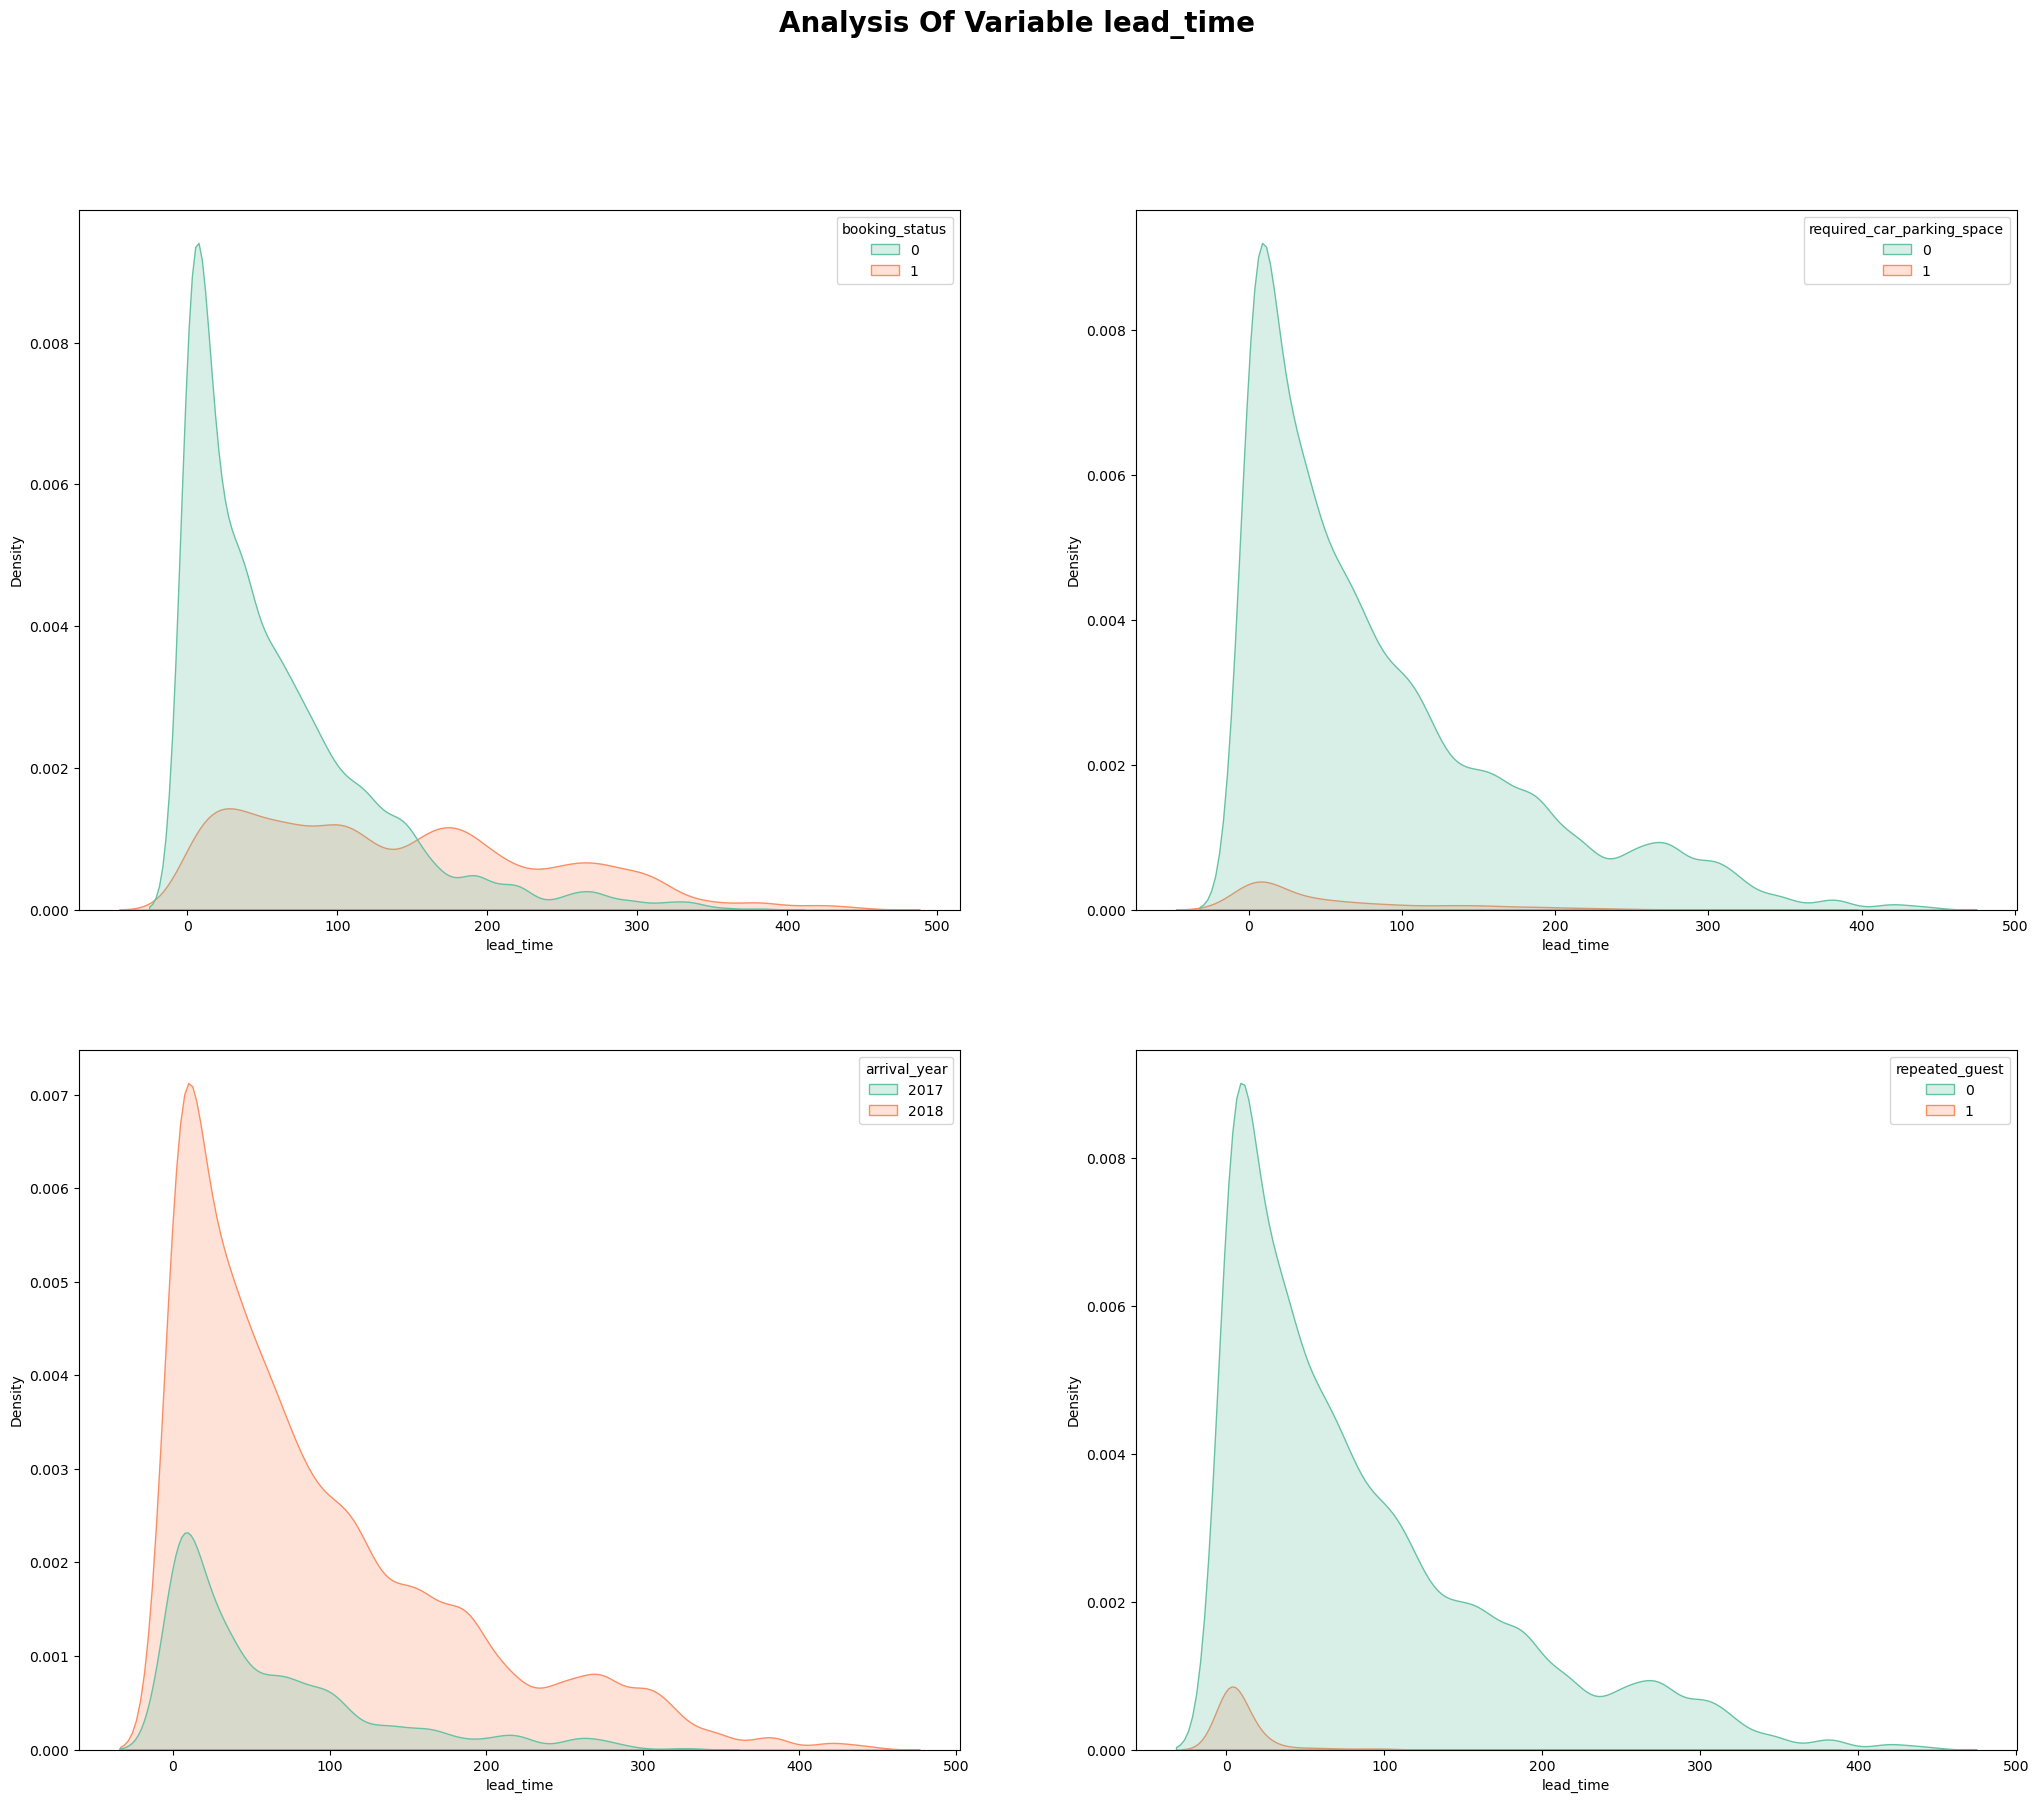

In [140]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', shade=True, data=df)

## Distribution by years, months, seasons, days

## market_segment_type 

## repeated_guest                     

## no_of_previous_cancellations

## no_of_previous_bookings_not_canceled

## avg_price_per_room 

## booking_status

1. dealing with missing values
2. normalization
3. standardization
4. formatting
5. binning

In [21]:
# change to boolean values: 
# required_car_parking_space, repeated_guest, booking_status